In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  /home/dh3553/projects/fairness-variance


# Visualizations

In [4]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_group_models_box_plot_per_test_set, create_bar_plot_for_model_selection

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'


## Initialize Configs

In [5]:
EXPERIMENT_NAME = 'out_of_domain_uncertainty_rich_income'
DB_COLLECTION_NAME = 'out_of_domain_uncertainty'
DATASET_NAME = 'Folktables_2018_Income'
EXPERIMENT_SESSION_UUID = '9af761cf-de63-4868-b8c1-75c7ee25103b'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'SEX&RAC1P']
MODEL_NAMES = ['RandomForestClassifier']

In [6]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [7]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [8]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(304, 33)

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
0,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-21 23:14:37.802,9af761cf-de63-4868-b8c1-75c7ee25103b,Exp_iter_1,...,0.814332,1.000000,0.000000,0.817274,1.000000,0.000000,0.812414,1.000000,0.000000,0.814800
1,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-21 23:14:37.812,9af761cf-de63-4868-b8c1-75c7ee25103b,Exp_iter_1,...,0.775008,1.000000,0.000000,0.797949,1.000000,0.000000,0.761951,1.000000,0.000000,0.779500
4,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-21 22:20:58.596,9af761cf-de63-4868-b8c1-75c7ee25103b,Exp_iter_1,...,0.816409,1.000000,0.000000,0.818904,1.000000,0.000000,0.815557,1.000000,0.000000,0.817200
5,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-21 22:20:58.607,9af761cf-de63-4868-b8c1-75c7ee25103b,Exp_iter_1,...,0.758205,1.000000,0.000000,0.774974,1.000000,0.000000,0.753756,1.000000,0.000000,0.764100
16,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-21 23:14:37.802,9af761cf-de63-4868-b8c1-75c7ee25103b,Exp_iter_1,...,0.642088,0.592650,0.858923,0.640048,0.593323,0.849030,0.636743,0.586265,0.855356,0.638365
17,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-21 23:14:37.812,9af761cf-de63-4868-b8c1-75c7ee25103b,Exp_iter_1,...,0.687830,0.637418,0.861478,0.672300,0.626640,0.852623,0.696314,0.643663,0.864839,0.684607
20,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-21 22:20:58.596,9af761cf-de63-4868-b8c1-75c7ee25103b,Exp_iter_1,...,0.616650,0.566054,0.841642,0.618760,0.571352,0.833138,0.609564,0.557862,0.838179,0.614079
21,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-21 22:20:58.607,9af761cf-de63-4868-b8c1-75c7ee25103b,Exp_iter_1,...,0.671161,0.616973,0.841081,0.659064,0.609255,0.830603,0.674758,0.619038,0.845316,0.667107
32,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-21 23:14:37.802,9af761cf-de63-4868-b8c1-75c7ee25103b,Exp_iter_1,...,0.814225,1.000000,0.000000,0.787491,1.000000,0.000000,0.824352,1.000000,0.000000,0.808242
33,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-21 23:14:37.812,9af761cf-de63-4868-b8c1-75c7ee25103b,Exp_iter_1,...,0.672468,1.000000,0.000000,0.611746,1.000000,0.000000,0.696366,1.000000,0.000000,0.663616


In [10]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [11]:
exp_subgroup_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
0,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-21 23:14:37.802,9af761cf-de63-4868-b8c1-75c7ee25103b,Exp_iter_1,...,0.814332,1.000000,0.000000,0.817274,1.000000,0.000000,0.812414,1.000000,0.000000,0.814800
16,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-21 23:14:37.802,9af761cf-de63-4868-b8c1-75c7ee25103b,Exp_iter_1,...,0.642088,0.592650,0.858923,0.640048,0.593323,0.849030,0.636743,0.586265,0.855356,0.638365
32,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-21 23:14:37.802,9af761cf-de63-4868-b8c1-75c7ee25103b,Exp_iter_1,...,0.814225,1.000000,0.000000,0.787491,1.000000,0.000000,0.824352,1.000000,0.000000,0.808242
48,FNR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-21 23:14:37.802,9af761cf-de63-4868-b8c1-75c7ee25103b,Exp_iter_1,...,0.183796,0.000000,1.000000,0.195936,0.000000,1.000000,0.179121,0.000000,1.000000,0.186366
64,FPR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-21 23:14:37.802,9af761cf-de63-4868-b8c1-75c7ee25103b,Exp_iter_1,...,0.187529,0.000000,1.000000,0.173118,0.000000,1.000000,0.197374,0.000000,1.000000,0.184125
80,IQR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-21 23:14:37.802,9af761cf-de63-4868-b8c1-75c7ee25103b,Exp_iter_1,...,0.057457,0.052373,0.079754,0.057083,0.052567,0.077283,0.057281,0.051977,0.080249,0.057184
96,Jitter,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-21 23:14:37.802,9af761cf-de63-4868-b8c1-75c7ee25103b,Exp_iter_1,...,0.059268,0.040340,0.142283,0.058616,0.040888,0.137911,0.056936,0.038050,0.138726,0.057761
112,Label_Stability,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-21 23:14:37.802,9af761cf-de63-4868-b8c1-75c7ee25103b,Exp_iter_1,...,0.915839,0.943225,0.795724,0.916950,0.942308,0.803534,0.919120,0.946680,0.799759,0.918055
128,Mean,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-21 23:14:37.802,9af761cf-de63-4868-b8c1-75c7ee25103b,Exp_iter_1,...,0.509822,0.515092,0.486706,0.553620,0.571245,0.474789,0.489061,0.488288,0.492410,0.520753
144,Overall_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-21 23:14:37.802,9af761cf-de63-4868-b8c1-75c7ee25103b,Exp_iter_1,...,0.651378,0.601227,0.871340,0.649207,0.601869,0.860931,0.646084,0.594859,0.867934,0.647617


In [12]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

In [13]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head(20)

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,-0.016815,-0.029907,-0.025847,RandomForestClassifier,Exp_iter_1,0.7,0
1,Equalized_Odds_FPR,-0.024256,-0.022396,-0.020668,RandomForestClassifier,Exp_iter_1,0.7,0
2,Equalized_Odds_FNR,0.016815,0.029907,0.025847,RandomForestClassifier,Exp_iter_1,0.7,0
3,Disparate_Impact,1.050944,1.067227,1.084873,RandomForestClassifier,Exp_iter_1,0.7,0
4,Statistical_Parity_Difference,0.050515,0.067192,0.085286,RandomForestClassifier,Exp_iter_1,0.7,0
5,Accuracy_Parity,0.004860,0.001094,0.003509,RandomForestClassifier,Exp_iter_1,0.7,0
6,Label_Stability_Ratio,0.997640,1.013716,1.018139,RandomForestClassifier,Exp_iter_1,0.7,0
7,IQR_Parity,-0.000198,-0.001574,-0.002047,RandomForestClassifier,Exp_iter_1,0.7,0
8,Std_Parity,-0.000054,-0.001409,-0.001743,RandomForestClassifier,Exp_iter_1,0.7,0
9,Std_Ratio,0.998703,0.966438,0.958336,RandomForestClassifier,Exp_iter_1,0.7,0


In [14]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head()

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,-0.016815,-0.029907,-0.025847,RandomForestClassifier,Exp_iter_1,0.7,0
1,Equalized_Odds_FPR,-0.024256,-0.022396,-0.020668,RandomForestClassifier,Exp_iter_1,0.7,0
2,Equalized_Odds_FNR,0.016815,0.029907,0.025847,RandomForestClassifier,Exp_iter_1,0.7,0
3,Disparate_Impact,1.050944,1.067227,1.084873,RandomForestClassifier,Exp_iter_1,0.7,0
4,Statistical_Parity_Difference,0.050515,0.067192,0.085286,RandomForestClassifier,Exp_iter_1,0.7,0


## Figure 1. Subgroup boxplots.

In [15]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [16]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 864x432 with 0 Axes>

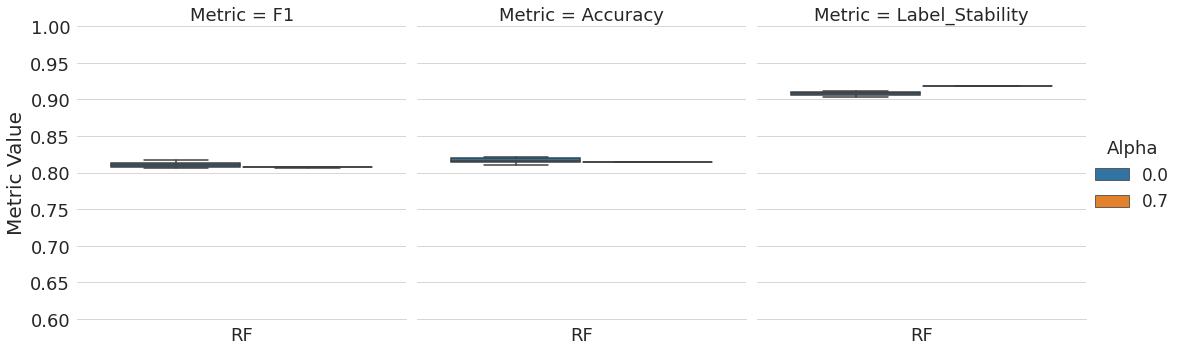

In [17]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.6, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

<Figure size 864x432 with 0 Axes>

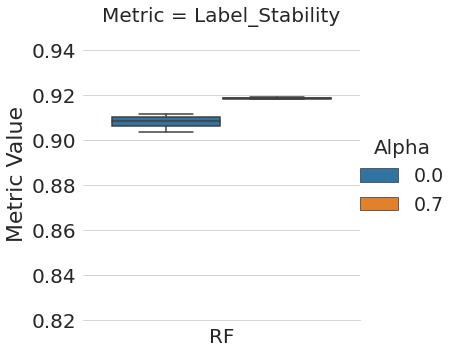

In [18]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.82, 0.95),
                                           metric_names=['Label_Stability'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 864x432 with 0 Axes>

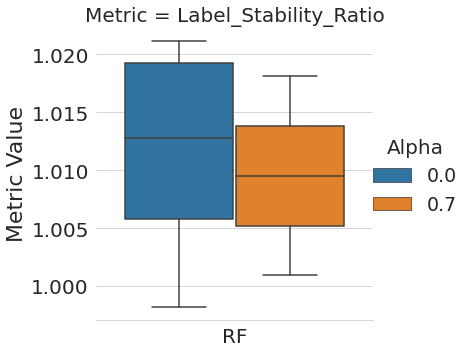

In [19]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='SEX&RAC1P',
                                           metric_names=['Label_Stability_Ratio'],
                                           vals_to_replace=vals_to_replace)

<Figure size 864x432 with 0 Axes>

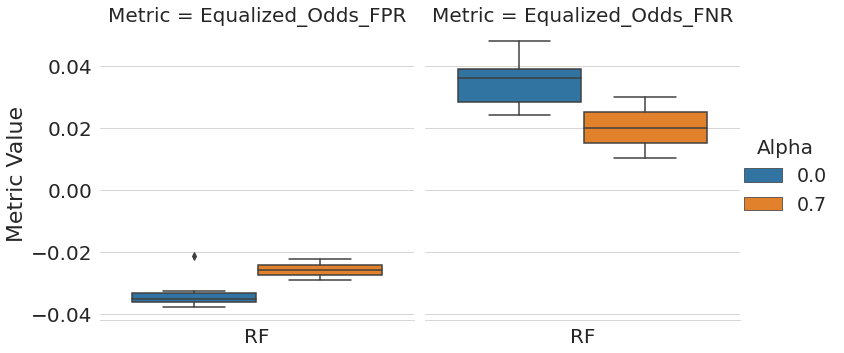

In [20]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='RAC1P',
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

## Figure 5. Out-of-domain boxplots.

In [21]:
new_vals_to_replace = vals_to_replace
new_vals_to_replace['Test_Set_Index'] = {
    0: 'Rich set',
    1: 'Poor set',
}

<Figure size 864x432 with 0 Axes>

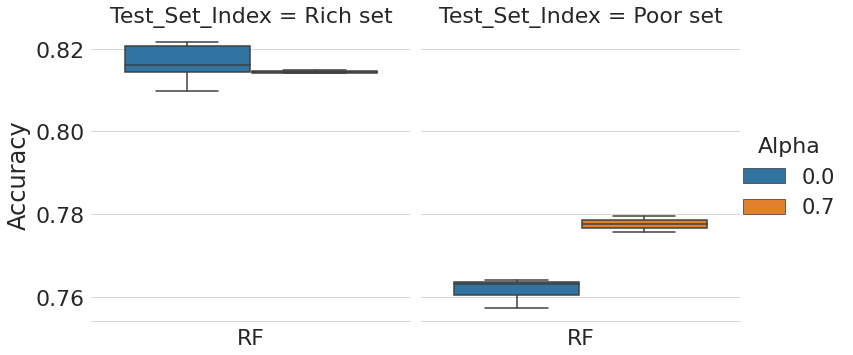

In [22]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Accuracy',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 864x432 with 0 Axes>

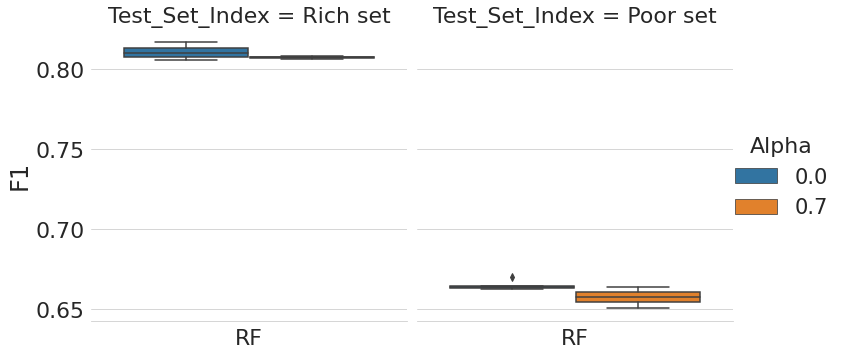

In [23]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='F1',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 864x432 with 0 Axes>

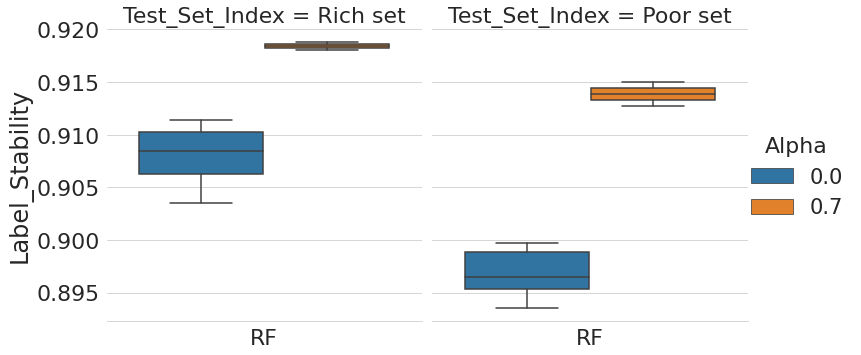

In [24]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Label_Stability',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 864x432 with 0 Axes>

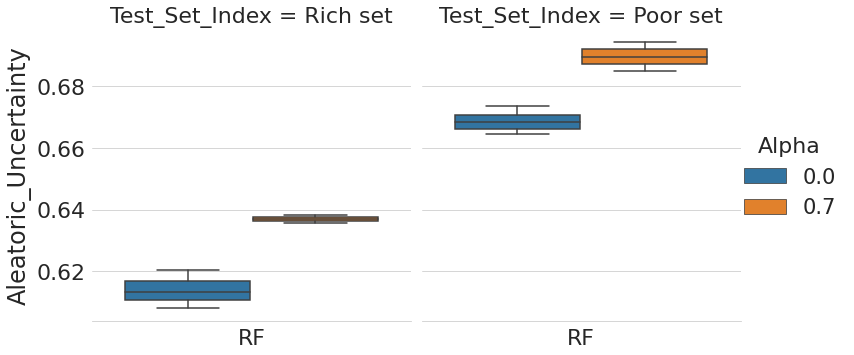

In [25]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Aleatoric_Uncertainty',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 864x432 with 0 Axes>

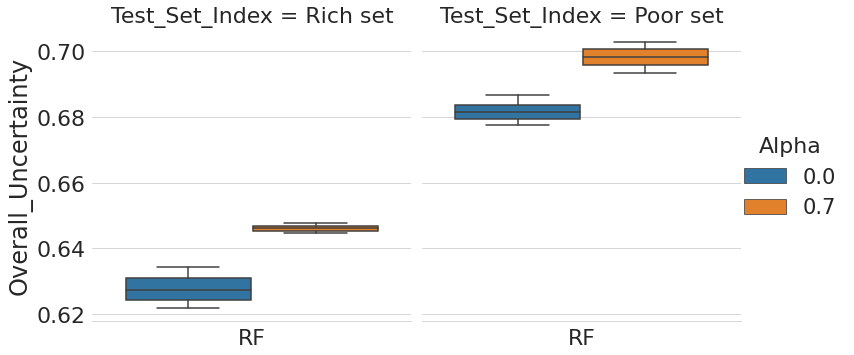

In [26]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Overall_Uncertainty',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 864x432 with 0 Axes>

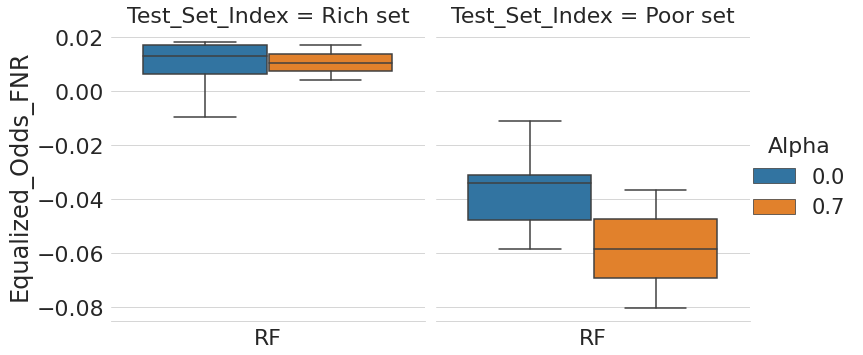

In [27]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='SEX',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 864x432 with 0 Axes>

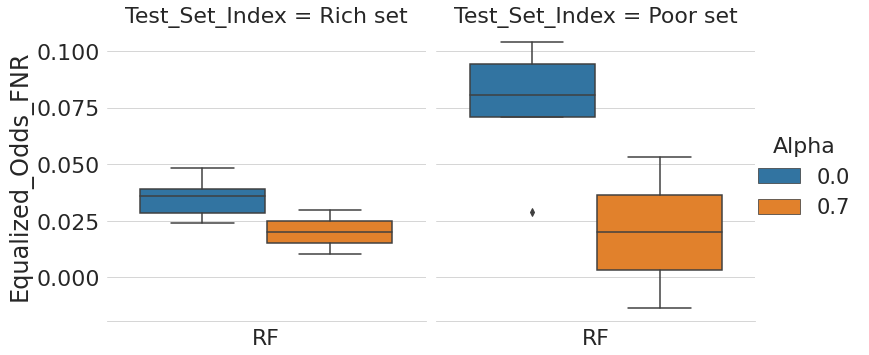

In [28]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='RAC1P',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 864x432 with 0 Axes>

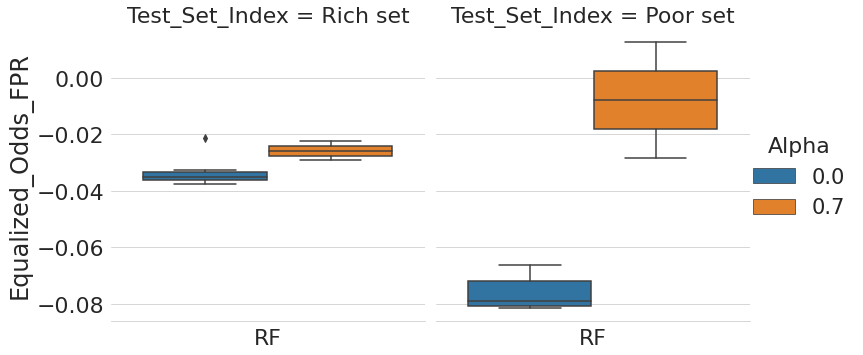

In [29]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FPR', group='RAC1P',
                                          vals_to_replace=new_vals_to_replace)